<a href="https://colab.research.google.com/github/forhigh/deeplearning_undergrad/blob/main/%5Bcomplete%5Dlab_03_1_Linear_Regression_and_Minimizing_Cost_eager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Linear-Regression-and-Minimizing-Cost

<img width="200" src="https://i.imgur.com/hbPVe1T.png">


In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.9.2


# Hypothesis and Cost

$$ H(x) = Wx + b $$ 

$$ cost(W, b)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (H{ x }^{ i }-y^{ i } })^{ 2 } }  $$

# Simplifed hypothesis

$$ H(x) = Wx $$ 

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$



b를 W 행렬에 넣어 표현할 수 있기 때문에 생략 가능

# Cost function
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

W = -1, cost(W) = 18.67
$$ cost(W)=\frac { 1 }{ 3 } ( (-1 * 1 - 1)^2 + (-1 * 2 - 2)^2 + (-1 * 3 - 3)^2) $$

W = 0, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (0 * 1 - 1)^2 + (0 * 2 - 2)^2 + (0 * 3 - 3)^2) $$

W = 1, cost(W) = 0
$$ cost(W)=\frac { 1 }{ 3 } ( (1 * 1 - 1)^2 + (1 * 2 - 2)^2 + (1 * 3 - 3)^2) $$

W = 2, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (2 * 1 - 1)^2 + (2 * 2 - 2)^2 + (2 * 3 - 3)^2) $$


# Cost function in pure Python

In [2]:
import numpy as np

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


# Cost function in TensorFlow

In [3]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

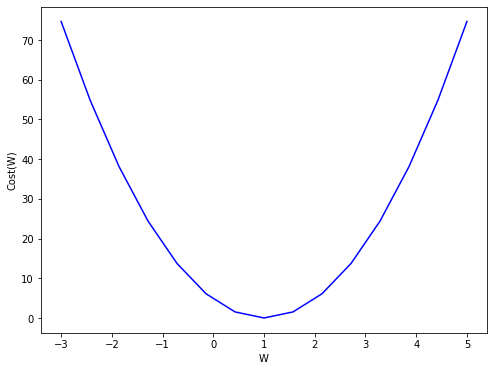

In [5]:
import matplotlib.pyplot as plt

plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

# How to minimize cost?
* 현재 데이터 X와 Y에 대해 W가 1일 때 cost 가 가장 작다
* cost 가 최소가 되는 W를 어떻게 찾을 수 있을까?

# Gradient descent algorithm
* Minimize cost function
* used many minimization problems
* For a given cost (W, b), it will find W, b to minimize cost
* It can be applied to more general function: cost (w1, w2, ...)

# How does it work?
* Start with initial guesses
 * Start at 0,0 (or any other value)
 * Keeping changing $W$ and $b$ a little bit to try and reduce $cost(W,b)$
* Each time you change the parameters, you select the gradient which reduces $cost(W,b)$ the most possible 
* Repeat
* Do so until you converge to a local minimum
* Has an interesting property
 * Where you start can determine which minimum you end up

http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html

# Formal definition
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

$$ \Downarrow $$

$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

* m 혹은 2m 나누는 것이 cost 최소화에 영향 없음
* 제곱을 미분할 때, 2가 앞으로 나오면서 공식이 단순하게 되는 효과

# Formal definition
$$ cost(W)=\frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

$$ W:=W - \alpha\frac{ \partial } {\partial W } cost(W) $$

* W = W - 변화량
* 변화량 = 현 위치(W)에서 비용곡선의 기울기(=미분값) X $\alpha$ <br> $\alpha$ : learning rate (시도 간격)

# Formal definition

$$ W:=W - \alpha\frac{ \partial } {\partial W } \frac { 1 }{ 2m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } } $$

$$ W:=W-\alpha \frac { 1 }{ 2m } \sum _{ i=1 }^{ m }{ { 2(W{ x }^{ i }-y^{ i } })x^{ i } }  $$

$$ W:=W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (W{ x }^{ i }-y^{ i } })x^{ i } }  $$



# Gradient descent algorithm
$$ W:=W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (W{ x }^{ i }-y^{ i } })x^{ i } }  $$

# Convex function
<img width="40%" src="http://i.imgur.com/TSKliup.png" >
<img width="40%" src="http://i.imgur.com/GyCwshy.png" >

Gradient descent algorithm을 사용하려면, 비용함수 cost(W,b)가 Convex function 이어야 한다

http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html

# Gradient descent 구현

In [6]:
tf.random.set_seed(0)  # for reproducibility

In [7]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))
        


    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


In [8]:
print(5.0 * W)
print(2.5 * W)

tf.Tensor([5.0001483], shape=(1,), dtype=float32)
tf.Tensor([2.5000741], shape=(1,), dtype=float32)


In [9]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([5.0])

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))
        


    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004


# Liner regression Summary

## 1) Hypothesis 

$$ H(x) = Wx + b $$

## 2) Cost function

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

## 3) Gradient descent

$$ W := W-\alpha \frac { \partial  }{ \partial W } cost(W) $$